
# Project: Investigate a Dataset - [TMDb movie data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset is about movies, it have a lot of interesting columns for example the budgent, revenue and vote avereage, it have old movies and new movies, there is 10,000 rows which is huge and fun in the same time.

### Question(s) for Analysis
Which genres make more profit and have more budget?
___
Is movie production increasing over the years?
***
What is the Drama mvoies percentage compare to the rest of the movies genres?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
#Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')

In [4]:
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# not all columns is showing so the following code will make them all appear
pd.set_option('display.max_columns', None)

In [6]:
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
df.shape

(10866, 21)


### Data Cleaning


### Removing Not needed Columns
#### Reason why:
**id**, **imdb_id**, **homepage**, **overview**, **keywords** and **tagline** they don't have any benfits in my analysis.
***
**popularity** in documetions it means Number of votes for the day and Number of views for the day and there is more but the main point is that popularity value in inconsistent because if movie release it in the same day the data was collected it will have more popularity than others, which unfair for older movies.
***
**budget** and **revenue** because I have budget_adj and revenue_adj which is more accurate as said in the docmention
***


In [8]:
df.drop(['id','imdb_id','popularity','budget','revenue','homepage','keywords','tagline',
'overview'],axis = 1 , inplace=True)

In [9]:
# making sure
df.head(0)

,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


## Now i will make sure there is no missing values or null valuse

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 1018.8+ KB


## So we have mulitple columns with missing values, i will drop these columns becasue i can't fill for instance "prouction_comapnies" with random name 

In [11]:
df.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 12 columns):
original_title          9773 non-null object
cast                    9773 non-null object
director                9773 non-null object
runtime                 9773 non-null int64
genres                  9773 non-null object
production_companies    9773 non-null object
release_date            9773 non-null object
vote_count              9773 non-null int64
vote_average            9773 non-null float64
release_year            9773 non-null int64
budget_adj              9773 non-null float64
revenue_adj             9773 non-null float64
dtypes: float64(3), int64(3), object(6)
memory usage: 992.6+ KB


## now i removed all null values, in the next step i will check more in the values to make sure everything is ok

In [13]:
df.describe()

,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9773.000000,9773.000000,9773.000000,9773.000000,9.773000e+03,9.773000e+03
mean,102.925509,239.298782,5.963430,2000.879362,1.941707e+07,5.704735e+07
std,27.876224,602.982068,0.913179,13.036453,3.566467e+07,1.514432e+08
min,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,90.000000,18.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,100.000000,46.000000,6.000000,2005.000000,3.114254e+05,0.000000e+00
75%,112.000000,173.000000,6.600000,2011.000000,2.469335e+07,4.311344e+07
max,877.000000,9767.000000,8.700000,2015.000000,4.250000e+08,2.827124e+09


here we have min value of runtime and budget and revenue equals 0 which incorrect, in my opnion runtime should be at least 20m long , and budget 10k at least , and revenue 1k at least, so i will see how many of them have less than 20m long and less than 10k budget and less than 1k revenue, if number of the data with these condtion is large, i will drop them , if not i will replace them with the mean.

In [14]:
x = df.query('budget_adj < 9999')
x.shape

(4808, 12)

So we have 4808 budget less than 10k so i will drop them

In [15]:
df = df[df['budget_adj'] > 9999]

In [16]:
# making sure it works
df.budget_adj.min()

10000.0

In [17]:
x = df.query('revenue_adj < 999')
x.shape

(1194, 12)

So we have 1194 budget less than 1000 so i will drop them

In [18]:
df = df[df['revenue_adj'] > 999]

In [19]:
df.revenue_adj.min()

1840.60441726065

In [20]:
x = df.query('runtime < 20')
x.shape

(0, 12)

Nice runtime problem solved with dropping of other rows

In [21]:
df.describe()  

,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3771.000000,3771.000000,3771.000000,3771.000000,3.771000e+03,3.771000e+03
mean,109.427738,537.944577,6.172315,2001.250066,4.502784e+07,1.399017e+08
std,19.790180,886.689802,0.791572,11.344979,4.490454e+07,2.175813e+08
min,26.000000,10.000000,2.200000,1960.000000,1.577503e+04,1.840604e+03
25%,96.000000,75.000000,5.700000,1995.000000,1.380818e+07,1.998162e+07
50%,106.000000,213.000000,6.200000,2004.000000,3.049201e+07,6.417903e+07
75%,119.000000,588.500000,6.700000,2010.000000,6.110140e+07,1.666739e+08
max,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


### Now the values looks way better, and the analysis will be more accuarte

In [22]:
df.shape

(3771, 12)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Whice genres make more profit?)

### I need to make new column for profit with this equation ( profit = revenue_adj - budget_adj )

In [23]:
df['profit'] = df.revenue_adj - df.budget_adj
df.tail()

,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
10822,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,131,Drama,Chenault Productions,6/21/66,74,7.5,1966,5.038511e+07,2.266436e+08,1.762585e+08
10828,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,128,Mystery|Thriller,Universal Pictures,7/13/66,46,6.3,1966,2.015404e+07,8.733419e+07,6.718015e+07
10829,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,120,Action|Western,Paramount Pictures|Laurel Productions,12/17/66,36,6.9,1966,3.125892e+07,4.030809e+07,9.049166e+06
10835,The Sand Pebbles,Steve McQueen|Richard Attenborough|Richard Cre...,Robert Wise,182,Action|Adventure|Drama|War|Romance,Twentieth Century Fox Film Corporation|Solar P...,12/20/66,28,7.0,1966,8.061618e+07,1.343603e+08,5.374412e+07
10848,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,Richard Fleischer,100,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,8/24/66,42,6.7,1966,3.436265e+07,8.061618e+07,4.625353e+07


### genres colum :

In [24]:
#here i will make copy of the dataframe to make some analysis on the genres, 
#i will be using "Genres" dataframe just for generis stuff other thing i will be using "df" dataframe,
#since there will be a lot of duplicated rows in "Genres".
Genres = df.copy()
#spliting genres row
Genres['genres'] = Genres['genres'].str.split('|')
# so split make list of genres now we need to explode it and make every genres alone in a row
Genres = Genres.explode('genres')
# to make sure every thing worked
print(Genres.shape , df.shape)
Genres.head(10)

(10095, 13) (3771, 13)


,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Adventure,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Science Fiction,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Science Fiction,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08


#### let's see the result of the count of each genres by value_counts() with a bar chart


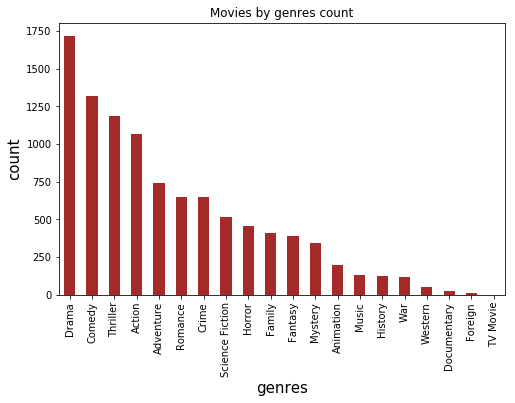

In [25]:
Genres['genres'].value_counts().plot(kind='bar',color="brown",figsize=(8,5));
plt.xlabel('genres',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.title('Movies by genres count')
plt.figure(figsize=(12,9))

#### now lets get the average for profit and budget for each genres and draw barh chart

Text(0,0.5,'Geners')

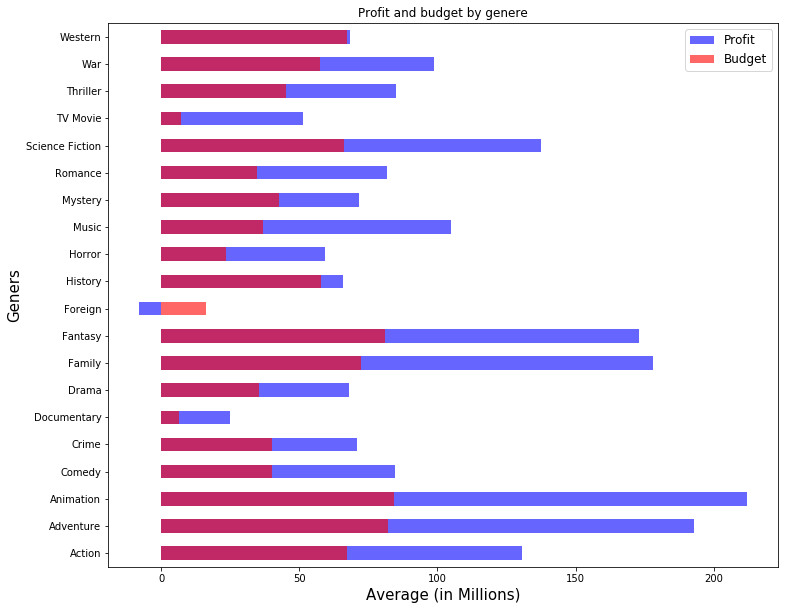

In [26]:
# here i divided by a million to make it easy to understand the number because the number is so huge (10^8) 
# and i used the mean becuase if i used sum() will not be fair for the genres that have less Count
AvgProfit = Genres.groupby('genres')['profit'].mean() / 1000000
AvgBudget = Genres.groupby('genres')['budget_adj'].mean() / 1000000

# i used "barh" chart to make genres in the horiztal, it's makes it more clear than "bar" chart

AvgProfit.plot(kind='barh', title='Profit and budget by genere', color='blue',figsize=(12,10),alpha=0.6)
AvgBudget.plot(kind='barh', color='red',figsize=(12,10),alpha=0.6)

plt.xlabel('Average (in Millions)',fontsize=15)
plt.legend(labels=['Profit','Budget'],fontsize=12)
plt.ylabel('Geners',fontsize=15)

#### Foregin movies didn't make any profit! they lost money too, i think making Foreign movies is a high risk,in the other hand Animation movies pay more and get more profit.

### Research Question 2  (Is movie production increasing over the years?)

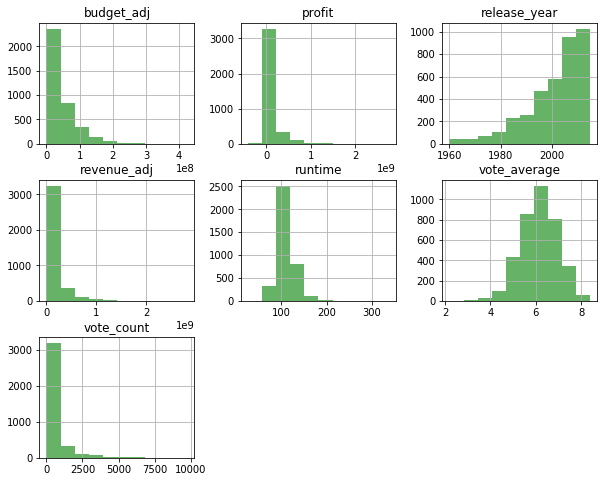

In [27]:
df.hist(color="g",alpha=0.6,figsize=(10,8));

release year is increasing let's investigate deeper

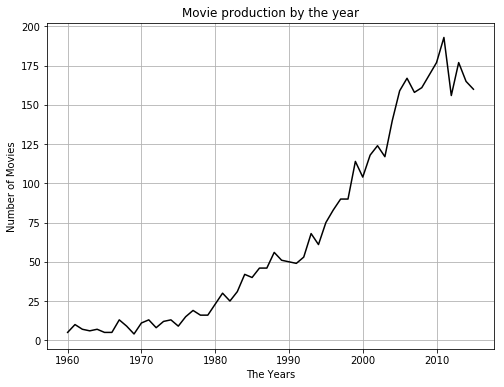

In [28]:
plt.figure(figsize=(8,6))
plt.plot(df.groupby('release_year')['vote_average'].count(),'k');
plt.title('Movie production by the year')
plt.xlabel('The Years')
plt.ylabel('Number of Movies')
plt.grid(True) 


from 1990 the movies is increasing rapdily, let's get the exact perecentage

In [29]:
def pie(label,size,title,color):
    labels = label 
    sizes = size 
    explode = (0, 0.1) 
    colors = color
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, explode=explode,shadow=True, autopct='%1.1f%%', startangle=90,colors=colors)
    ax1.axis('equal')
    plt.title(title)
    plt.show()

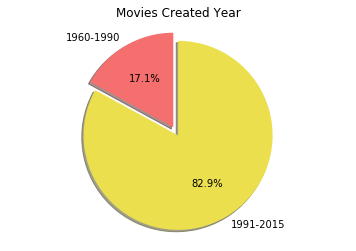

In [30]:
Old_movies = df.query('release_year < 1991')
New_movies = df.query('release_year >= 1991')
labels = '1960-1990', '1991-2015'
sizes = [Old_movies.count()[0],New_movies.count()[0]]
title = 'Movies Created Year'
color = ['#F56F6F','#EBDF4E']
pie(labels,sizes,title,color)

#### WOW! from all the movies was created, 83% is created in the past 24 years.

### Research Question 3  (What is the Drama mvoies percentage compare to the rest of the movies genres)

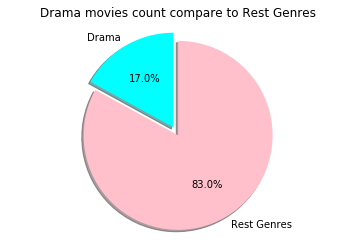

In [31]:
Drama = Genres.query('genres == "Drama"')
Rest = Genres.query('genres != "Drama"')
label = 'Drama','Rest Genres'
size = [Drama.count()[0],Rest.count()[0]]
titlee = 'Drama movies count compare to Rest Genres'
colors = ['cyan','pink']
pie(label,size,titlee,colors)

<a id='conclusions'></a>
## Conclusions

-Most movies are made with these genres (Drama,Comdey,Thriller,Action)

-If you think of making movies from theses genres (Animation,Adventure,Fatnasy,Family) will cost you more but will gain more profit, and (Forgien,Western,History) movies will have more risk because theses genres don't get profit often of the time, making movies from theses genres, and (TV Movie, Documentry) not need a big budget but you will have good profit.

-There are a lot of movies are made these days compare to 30 years ago

-From all the movies was created, 83% is created in the past 24 years.

-Drama movies have 17% of all movies created.
### limitaion

-Half of the dataset was having values of runtime and budget and revenue equals 0 which incorrect, so the only solution to drop them.  


In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0